# Machine Learning for Neuroimaging 

## Hands on Statistics & ML (Python) - 10/19/2023
### Part 3: Visualization of MRI data

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import GraphicalLassoCV # Estimate the covariance
import nibabel as nib # NiBabel to read common neuroimaging files
from nilearn import datasets # Built-in datasets
from nilearn import plotting # Graphical visualization
from nilearn.maskers import NiftiMapsMasker

## Visualization of structural MRI

### We start by visualizing one sample from the BraTS dataset

In [11]:
fname = 'data/BraTS20_Training_101/BraTS20_Training_101_t2.nii.gz'
mri_img = nib.load(fname)
mri_img = mri_img.get_fdata()
print(f'The shape of the MRI is {mri_img.shape}')

The shape of the MRI is (240, 240, 155)


### Visulization of the MRI image
- 3D MRI, 3D data
- Plot the data using grayscale
- The scan can be observed from three different views: Axial, Sagittal Coronal
- We visualize one slice from each view

![SNOWFALL](data/MRI_3views.PNG)

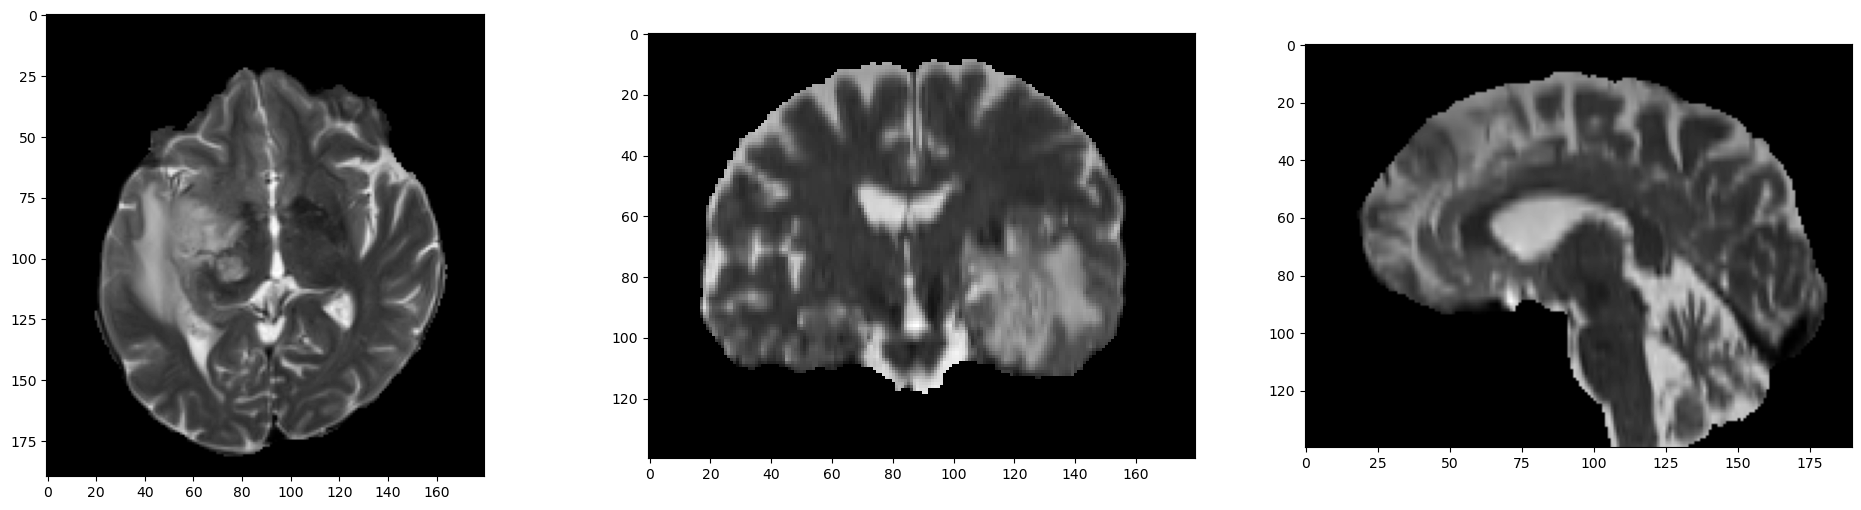

In [12]:
# slicing array based on direecions
MRI_3D =  mri_img[30:-30,30:-20, 7:-8]
img_a = MRI_3D[:,:, 60]
img_c = MRI_3D[:,95, :]
img_s = MRI_3D[90, :, :]

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (24, 6))

ax1.imshow(np.rot90(img_a, axes=(1,0)), cmap='gray')
# ax2.imshow(np.rot90(img_c, axes=(1,0)), cmap='gray')
ax2.imshow(np.rot90(img_c), cmap='gray') #, cmap= plt.cm.magma
ax3.imshow(np.rot90(img_s), cmap='gray')

## Visualization of glass volumes

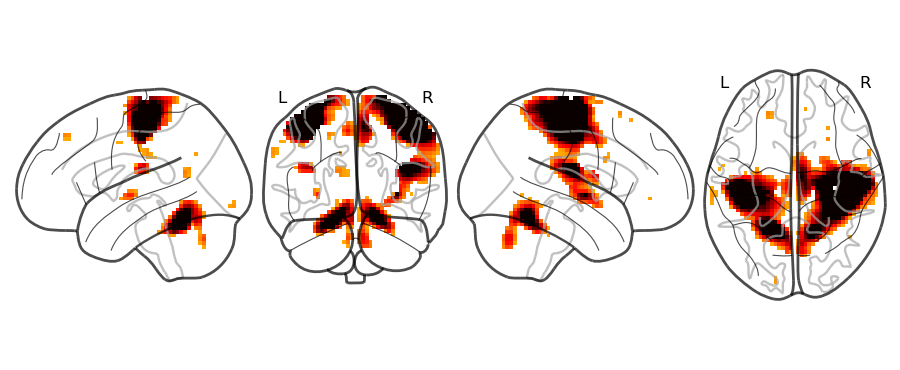

In [13]:
# Let's plot activations within a glass volume rendering

plotting.plot_glass_brain(
    "data/image_10426.nii.gz",
    display_mode="lyrz",
    threshold=3,
)

plotting.show()

## Visualization of a connectome

In [14]:
# Now, let's plot fMRI connectivity

# First, retrieve the brain development fmri dataset

atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

# Loading the functional datasets
data = datasets.fetch_development_fmri(n_subjects=1)


In [15]:
# We fit the image to the atlas
import warnings
warnings.filterwarnings("ignore")
masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache"
)

time_series = masker.fit_transform(data.func[0], confounds=data.confounds)

estimator = GraphicalLassoCV()
estimator.fit(time_series)

GraphicalLassoCV()

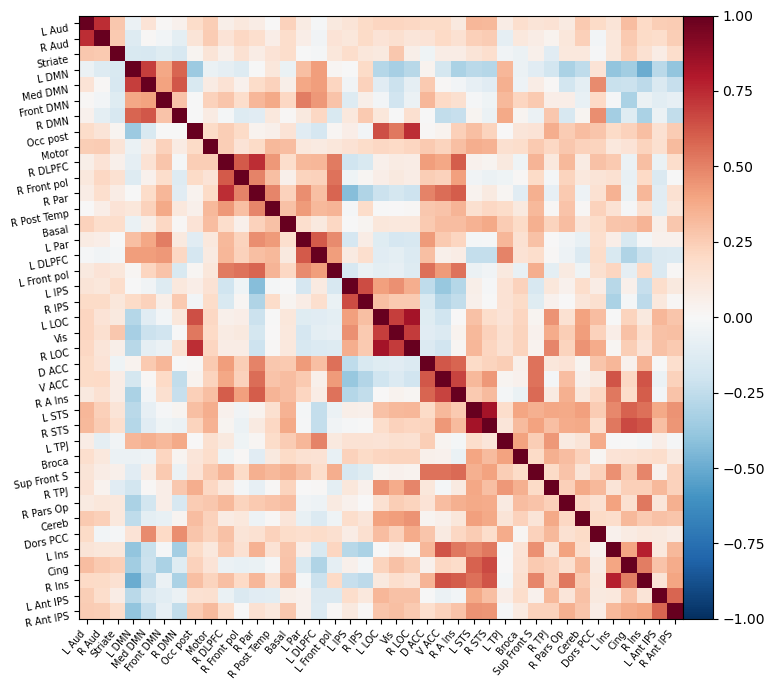

In [16]:
# We now calculate the covariance between BOLD signals
plotting.plot_matrix(
    estimator.covariance_,
    labels=labels,
    figure=(9, 7),
    vmax=1,
    vmin=-1
)

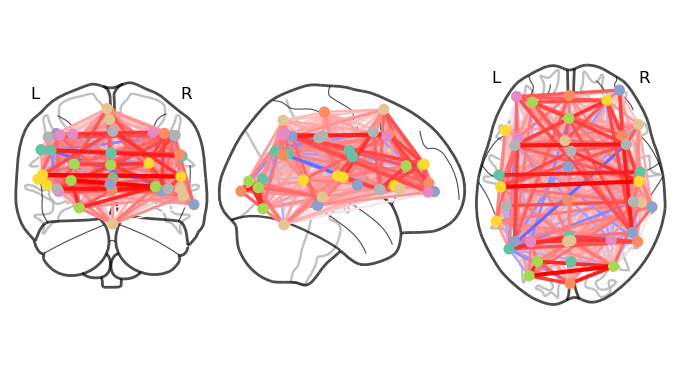

In [17]:
# 2D visualization from several perspectives
coords = atlas.region_coords
plotting.plot_connectome(estimator.covariance_, coords)

In [18]:
# 3D visualization
view = plotting.view_connectome(-estimator.precision_, coords)
view